In [127]:
#
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
import math
import time
import io
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
# ivol_sep22.csv and on
# lasep22                  is AUG 31 looking into Sep 2022 DONE 2.45   ivol2_sep22  .csv
# 2jdfoct22              is SEPT 30 looking into Oct 2022  DONE 2.8    ivol2_oct22
# looking4JDF_intonovember    is OCT looking into Nov 2022 DONE 3.73   ivol2_nov22
# lookingintoDEC22          is NOV30 looking into Dec 2022 DONE 4.08   ivol2_dec22
# lookingintoJAN23       is Dec 2022 looking into Jan 2023 DONE 4.12   ivol2_jan23
#lookingintoFEB23                    is Jan2023 into feb23 DONE 4.6    ivol2_feb23
# lookatmarfrfr23                         is Feb2023 into mar23 4.65   ivol2_mar23
ivolfiles = ['/content/drive/My Drive/ivol2_sep22.csv',
             '/content/drive/My Drive/ivol2_oct22.csv',
             '/content/drive/My Drive/ivol2_nov22.csv',
             '/content/drive/My Drive/ivol2_dec22.csv',
             '/content/drive/My Drive/ivol2_jan23.csv',
             '/content/drive/My Drive/ivol2_feb23.csv',
             '/content/drive/My Drive/ivol2_mar23.csv']
# m86weights date ticker sprc shares mktcap
Wsheet_values = [
    'aug 1',
    'sep 1',
    'oct 3',
    'nov 1',
    'dec 1',
    'jan 3',
    'feb 1']
# m86retsdata:  date ticker shareclass sprc dailyreturns
RSheet_values = [
    'aug 22',
    'sep 22',
    'oct 22',
    'nov 22',
    'dec 22',
    'jan 23',
    'feb 23']
monthcodes = [8,9,10,11,12,1,2,3]
riskfreerates = [2.45,2.8,3.73,4.08,4.12,4.6,4.65]#30d exp bond
years = [2022,2022,2022,2022,2022,2023,2023,2023]

AnalysisNumber = 5 # 0 thru 6. 0,1,2,3,4 done

RFR = riskfreerates[AnalysisNumber]
monthcode = monthcodes[AnalysisNumber] # 8 = aug duh #for later portfolio looping
ivfile = ivolfiles[AnalysisNumber]
WSheet = Wsheet_values[AnalysisNumber]
RSheet = RSheet_values[AnalysisNumber]
year1 = years[AnalysisNumber]

monthcode2 = monthcodes[AnalysisNumber+1]
WSheet2 = Wsheet_values[AnalysisNumber+1]
RSheet2 = RSheet_values[AnalysisNumber+1]
year2 = years[AnalysisNumber+1]
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
from openpyxl import load_workbook
returns_data = "/content/drive/My Drive/m86retsdata.xlsx"
market_cap_data = "/content/drive/My Drive/m86weights.xlsx"
WBR = load_workbook(returns_data) # date ticker shareclass sprc dailyreturns
WBM = load_workbook(market_cap_data) # date ticker sprc shares mktcap
ivoldf = pd.read_csv(ivfile)


In [129]:
wsm = WBM[WSheet]
mktcapdata = []
for row in wsm.iter_rows(values_only=True):
    mktcapdata.append(row)
dfm = pd.DataFrame(mktcapdata[1:], columns=mktcapdata[0])
dfm = dfm.loc[:, ["date", "ticker", "sprc", "mktcap"]]
#print(dfm)
for index, row in dfm.iterrows():
    ticker = row['ticker']
    occurrences = dfm[dfm['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfm.at[index, 'ticker'] = new_ticker

#print(dfm)
dfm = dfm[~dfm['ticker'].str.endswith('_A')]
print(dfm)

          date ticker        sprc        mktcap
0   2023-01-03   ORCL   83.720001  2.257303e+08
1   2023-01-03   MSFT  239.580002  1.784152e+09
2   2023-01-03   TROW  109.150002  2.448344e+07
3   2023-01-03    HON  214.300003  1.430667e+08
4   2023-01-03    ADM   89.650002  4.924779e+07
..         ...    ...         ...           ...
515 2023-01-03     DG  246.720001  5.516042e+07
516 2023-01-03   FTNT   48.520000  3.791838e+07
517 2023-01-03   GNRC   97.709999  6.190515e+06
518 2023-01-03   CBOE  126.330002  1.340134e+07
519 2023-01-03   TSLA  108.099998  3.420284e+08

[520 rows x 4 columns]


In [130]:
wsm2 = WBM[WSheet2] # for month 2
mktcapdata = []
for row in wsm2.iter_rows(values_only=True):
    mktcapdata.append(row)
dfm2 = pd.DataFrame(mktcapdata[1:], columns=mktcapdata[0])
dfm2 = dfm2.loc[:, ["date", "ticker", "sprc", "mktcap"]]
#print(dfm2)
for index, row in dfm2.iterrows():
    ticker = row['ticker']
    occurrences = dfm2[dfm2['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfm2.at[index, 'ticker'] = new_ticker

#print(dfm2)
dfm2 = dfm2[~dfm2['ticker'].str.endswith('_A')]
print(dfm2)

          date ticker        sprc        mktcap
0   2023-02-01   ORCL   90.050003  2.427976e+08
1   2023-02-01   MSFT  252.750000  1.881421e+09
2   2023-02-01   TROW  120.040001  2.692617e+07
3   2023-02-01    HON  206.720001  1.381179e+08
4   2023-02-01    ADM   83.370003  4.579798e+07
..         ...    ...         ...           ...
515 2023-02-01     DG  235.610001  5.267651e+07
516 2023-02-01   FTNT   53.090000  4.148984e+07
517 2023-02-01   GNRC  126.540001  8.017068e+06
518 2023-02-01   CBOE  123.050003  1.305339e+07
519 2023-02-01   TSLA  181.410004  5.739999e+08

[520 rows x 4 columns]


In [131]:
wsr = WBR[RSheet]
returnsdata = []
for row in wsr.iter_rows(values_only=True):
    returnsdata.append(row)
dfr = pd.DataFrame(returnsdata[1:], columns=returnsdata[0])
dfr = dfr.loc[:, ["date", "ticker","shareclass", "sprc", "dailyreturns"]]
#print(df)
dfr = dfr[dfr['shareclass'] != 'A']
#print(dfr)
for index, row in dfr.iterrows():
    ticker = row['ticker']
    occurrences = dfr[dfr['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfr.at[index, 'ticker'] = new_ticker

#print(dfr)
dfr = dfr[~dfr['ticker'].str.endswith('_A')]
print(dfr)

            date ticker shareclass        sprc  dailyreturns
0     2023-01-03   ORCL              83.720001      0.024223
1     2023-01-04   ORCL              84.480003      0.009078
2     2023-01-05   ORCL              84.309998     -0.002012
3     2023-01-06   ORCL              85.660004      0.016012
4     2023-01-09   ORCL              86.419998      0.012608
...          ...    ...        ...         ...           ...
10395 2023-01-25   TSLA             144.429993      0.003753
10396 2023-01-26   TSLA             160.270004      0.109673
10397 2023-01-27   TSLA             177.899994      0.110002
10398 2023-01-30   TSLA             166.660004     -0.063182
10399 2023-01-31   TSLA             173.220001      0.039362

[9739 rows x 5 columns]


In [132]:
wsr2 = WBR[RSheet2] #for month 2
returnsdata = []
for row in wsr2.iter_rows(values_only=True):
    returnsdata.append(row)
dfr2 = pd.DataFrame(returnsdata[1:], columns=returnsdata[0])
dfr2 = dfr2.loc[:, ["date", "ticker","shareclass", "sprc", "dailyreturns"]]

dfr2 = dfr2[dfr2['shareclass'] != 'A']
#print(dfr)
for index, row in dfr2.iterrows():
    ticker = row['ticker']
    occurrences = dfr2[dfr2['ticker'] == ticker].shape[0]
    # Check if the number of occurrences is double or near double
    if occurrences >= 30:
        if occurrences % 2 == 0:
            # Append a letter to the ticker to distinguish between occurrences
            new_ticker = f"{ticker}_A" if index % 2 == 0 else f"{ticker}"
            dfr2.at[index, 'ticker'] = new_ticker

#print(dfr)
dfr2 = dfr2[~dfr2['ticker'].str.endswith('_A')]
print(dfr2)

           date ticker shareclass        sprc  dailyreturns
0    2023-02-01   ORCL              90.050003      0.017974
1    2023-02-02   ORCL              89.379997     -0.007440
2    2023-02-03   ORCL              89.620003      0.002685
3    2023-02-06   ORCL              88.529999     -0.012163
4    2023-02-07   ORCL              87.739998     -0.008924
...         ...    ...        ...         ...           ...
9875 2023-02-22   TSLA             200.860001      0.017683
9876 2023-02-23   TSLA             202.070007      0.006024
9877 2023-02-24   TSLA             196.880005     -0.025684
9878 2023-02-27   TSLA             207.630005      0.054602
9879 2023-02-28   TSLA             205.710007     -0.009247

[9252 rows x 5 columns]


In [133]:
tickers = dfm['ticker'].unique()
# Create a dictionary to store the weights of each ticker for each portfolio
portfolio_weights = {'ticker': tickers}
for n in range(1, 501):
    top_n_tickers = dfm.nlargest(n, 'mktcap')['ticker'].tolist()
    portfolio_weights[f'N{n}'] = [dfm.loc[dfm['ticker'] == ticker, 'mktcap'].sum() / dfm['mktcap'].sum() if ticker in top_n_tickers else 0 for ticker in tickers]

weights_df = pd.DataFrame(portfolio_weights)
weights_df.iloc[:, 1:] = weights_df.iloc[:, 1:].div(weights_df.iloc[:, 1:].sum()) # rescale based on N for portfolios
print(weights_df)

    ticker   N1        N2       N3       N4        N5        N6        N7  \
0     ORCL  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
1     MSFT  0.0  0.473808  0.38414  0.34444  0.312425  0.287987  0.267846   
2     TROW  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
3      HON  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
4      ADM  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
..     ...  ...       ...      ...      ...       ...       ...       ...   
510     DG  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
511   FTNT  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
512   GNRC  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
513   CBOE  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   
514   TSLA  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.000000   

           N8        N9  ...      N491      N492      N493      N494  \
0  

In [134]:
tickers2 = dfm2['ticker'].unique() #month 2
# Create a dictionary to store the weights of each ticker for each portfolio
portfolio_weights = {'ticker': tickers2}
for n in range(1, 501):
    top_n_tickers = dfm2.nlargest(n, 'mktcap')['ticker'].tolist()
    portfolio_weights[f'N{n}'] = [dfm2.loc[dfm2['ticker'] == ticker, 'mktcap'].sum() / dfm2['mktcap'].sum() if ticker in top_n_tickers else 0 for ticker in tickers2]

weights_df2 = pd.DataFrame(portfolio_weights)
weights_df2.iloc[:, 1:] = weights_df2.iloc[:, 1:].div(weights_df2.iloc[:, 1:].sum()) # rescale based on N for portfolios
print(weights_df2)

    ticker   N1        N2        N3        N4        N5        N6        N7  \
0     ORCL  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     MSFT  0.0  0.449842  0.357691  0.320775  0.291088  0.267346  0.249068   
2     TROW  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      HON  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      ADM  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..     ...  ...       ...       ...       ...       ...       ...       ...   
510     DG  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
511   FTNT  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
512   GNRC  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
513   CBOE  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
514   TSLA  0.0  0.000000  0.000000  0.000000  0.000000  0.081564  0.075988   

           N8        N9  ...      N491      N492   

In [135]:
#for month 1
dfrsort = dfr.sort_values(by=['date','ticker'])
dfrsort = dfrsort.reset_index(drop=True)
print(dfrsort)
wgtsort = weights_df.sort_values(by='ticker')
wgtsort = wgtsort.reset_index(drop=True)
print(wgtsort)

#for month 2
dfrsort2 = dfr2.sort_values(by=['date','ticker'])
dfrsort2 = dfrsort2.reset_index(drop=True)
print(dfrsort2)
wgtsort2 = weights_df2.sort_values(by='ticker')
wgtsort2 = wgtsort2.reset_index(drop=True)
print(wgtsort2)

#Testing for just one date: (runs quickly lol)
# date_subset = dfrsort[dfrsort['date'] == '2022-08-01']
# print(date_subset)
# portTotals = []
# ticker_weights = {ticker: wgtsort[wgtsort['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort['ticker'].unique()}
# for column in weights_df.columns[1:]:  # Exclude the 'ticker' column
#     portTotal = 0
#     for _, row in date_subset.iterrows():
#         ticker = row['ticker']
#         if ticker in ticker_weights:
#             weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
#             add = row['dailyreturns'] * weight
#             portTotal += add
#     portTotals.append(portTotal)
# print(portTotals)

           date ticker shareclass        sprc  dailyreturns
0    2023-01-03      A             150.039993      0.002606
1    2023-01-03    AAL              12.740000      0.001572
2    2023-01-03   AAPL             125.070000     -0.037405
3    2023-01-03   ABBV             162.380005      0.004765
4    2023-01-03    ABT             109.580002     -0.001913
...         ...    ...        ...         ...           ...
9734 2023-01-31   XRAY              36.830002      0.008213
9735 2023-01-31    XYL             104.010002      0.028783
9736 2023-01-31    YUM             130.509995      0.011392
9737 2023-01-31    ZBH             127.339996      0.012000
9738 2023-01-31   ZION              53.160000      0.017806

[9739 rows x 5 columns]
    ticker   N1        N2        N3        N4        N5        N6        N7  \
0        A  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      AAL  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     AAPL  1.0  0

In [136]:
allports = pd.DataFrame()
for i in range(1,32):
  d = f"{str(year1)}-{monthcode:02d}-{i:02d}"
  #print(d)
  try:
    date_subset = dfrsort[dfrsort['date'] == d]
    #print(date_subset)
  except KeyError:
    #print(i)
        # Skip to the next iteration if the date subset is missing
    continue
  #print(date_subset)

  portTotals = []
  ticker_weights = {ticker: wgtsort2[wgtsort2['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort2['ticker'].unique()}
  for column in weights_df2.columns[1:]:  # Exclude the 'ticker' column
      portTotal = 0
      for _, row in date_subset.iterrows():
          ticker = row['ticker']
          if ticker in ticker_weights:
              weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
              add = row['dailyreturns'] * weight
              portTotal += add

      portTotals.append(portTotal)

  #print(portTotals)
  newCol = "day"+str(i)
  allports[newCol] = portTotals
allports = allports.multiply(10)
print(allports)

     day1  day2      day3      day4      day5      day6  day7  day8      day9  \
0       0     0 -0.374047  0.103142 -0.106047  0.367941     0     0  0.040889   
1       0     0 -0.210287 -0.140031 -0.191665  0.255441     0     0  0.066294   
2       0     0 -0.122825 -0.127577 -0.201005  0.276064     0     0  0.083174   
3       0     0 -0.098866 -0.125801 -0.202830  0.264105     0     0  0.082083   
4       0     0 -0.089716 -0.114158 -0.184059  0.239663     0     0  0.074486   
..    ...   ...       ...       ...       ...       ...   ...   ...       ...   
495     0     0 -0.050459  0.072705 -0.107491  0.212422     0     0  0.006838   
496     0     0 -0.050452  0.072695 -0.107475  0.212391     0     0  0.006837   
497     0     0 -0.050458  0.072751 -0.107421  0.212387     0     0  0.006833   
498     0     0 -0.050450  0.072789 -0.107430  0.212381     0     0  0.006837   
499     0     0 -0.050430  0.072784 -0.107443  0.212349     0     0  0.006842   

        day10  ...  day22  

In [137]:
#month 2
allports2 = pd.DataFrame()
for i in range(1,32):
  d = f"{str(year2)}-{monthcode2:02d}-{i:02d}"
  #print(d)
  #print(d)
  try:
    date_subset = dfrsort2[dfrsort2['date'] == d]
    #print(date_subset)
  except KeyError:
    #print(i)
        # Skip to the next iteration if the date subset is missing
    continue
  #print(date_subset)

  portTotals = []
  ticker_weights = {ticker: wgtsort2[wgtsort2['ticker'] == ticker].set_index('ticker').squeeze() for ticker in wgtsort2['ticker'].unique()}
  for column in weights_df2.columns[1:]:  # Exclude the 'ticker' column
      portTotal = 0
      for _, row in date_subset.iterrows():
          ticker = row['ticker']
          if ticker in ticker_weights:
              weight = ticker_weights[ticker].get(column, 0)  # Get the weight for the current column, default to 0 if not found
              add = row['dailyreturns'] * weight
              portTotal += add

      portTotals.append(portTotal)

  #print(portTotals)
  newCol = "day"+str(i)
  allports2[newCol] = portTotals
allports2 = allports2.multiply(10)
print(allports2)

         day1      day2      day3  day4  day5      day6      day7      day8  \
0    0.079008  0.370626  0.243999     0     0 -0.179288  0.192447 -0.176527   
1    0.133141  0.414808  0.027983     0     0 -0.126148  0.294909 -0.111072   
2    0.145991  0.481013 -0.150470     0     0 -0.124281  0.233093 -0.129646   
3    0.147045  0.506360 -0.168900     0     0 -0.128619  0.254620 -0.193069   
4    0.133437  0.459499 -0.153269     0     0 -0.116716  0.231056 -0.175202   
..        ...       ...       ...   ...   ...       ...       ...       ...   
495  0.099848  0.108030 -0.087066     0     0 -0.052423  0.111172 -0.083258   
496  0.099834  0.108014 -0.087053     0     0 -0.052416  0.111156 -0.083246   
497  0.099833  0.108075 -0.086997     0     0 -0.052437  0.111160 -0.083256   
498  0.099848  0.108104 -0.087002     0     0 -0.052456  0.111159 -0.083248   
499  0.099852  0.108115 -0.086998     0     0 -0.052474  0.111154 -0.083258   

         day9     day10  ...     day22     day23   

In [138]:
#print(dfrsort)
#print(dfrsort2)

In [139]:
#print(dfrsort.head(-10)) #date ticker price etc.
grouped_df = dfrsort.groupby(['ticker', 'date']).agg({'sprc': 'mean'}).reset_index()
pivot_df = grouped_df.pivot(index='ticker', columns='date', values='sprc')
pivot_df.reset_index(inplace=True)
df3 = pivot_df.copy()
df3.set_index("ticker", inplace=True)
df3.rename(columns={"date": "ticker"}, inplace=True)
#print(df3.head(10))
#print(df3.shape[0])  # Check the number of rows in df3
df3t = df3.transpose()
#print("yeeho1")

ticker_weights_N500 = wgtsort2.set_index('ticker')['N500']
# Sort the ticker columns of df3t DataFrame based on the weights in N500 column
df3t = df3t.reindex(columns=ticker_weights_N500.sort_values(ascending=False).index)
# Display the reordered DataFrame
#print(df3t)

#print("yeeho2")

#print(df3t.head(10))
cov3 = df3t.cov()
cov3 = cov3.fillna(0)
print(cov3)

ticker       AAPL       MSFT       AMZN       GOOG  GOOGL        TSLA  \
ticker                                                                  
AAPL    44.034968  42.403481  36.683744  29.692925    0.0  130.929721   
MSFT    42.403481  58.687320  39.873067  31.669314    0.0  131.091662   
AMZN    36.683744  39.873067  35.406585  24.715451    0.0  107.775252   
GOOG    29.692925  31.669314  24.715451  22.940605    0.0   87.704103   
GOOGL    0.000000   0.000000   0.000000   0.000000    0.0    0.000000   
...           ...        ...        ...        ...    ...         ...   
ITI      0.519678   0.360211   0.485791   0.251302    0.0    1.575371   
CMT      4.779345   5.005597   4.078924   3.105725    0.0   15.812615   
METV     3.047773   3.005521   2.644599   2.056500    0.0    8.917430   
MLSS     0.500063   0.483338   0.433636   0.338489    0.0    1.316972   
WABC    -6.983831  -5.365907  -5.161664  -5.033304    0.0  -21.277978   

ticker        NVDA        XOM        UNH        JN

In [140]:
#now replace cov diagonals with IV^2 data:
ticker_to_iv = dict(zip(ivoldf['Ticker Symbol'], ivoldf['BS_IV']))

# Iterate over the diagonal elements of the covariance matrix
for ticker in cov3.index:
    if ticker in ticker_to_iv:
        # Replace the diagonal element with the corresponding BS_IV value
        cov3.at[ticker, ticker] = ((ticker_to_iv[ticker])**2 )*100

print(cov3)

ticker       AAPL       MSFT       AMZN       GOOG      GOOGL        TSLA  \
ticker                                                                      
AAPL     9.721082  42.403481  36.683744  29.692925   0.000000  130.929721   
MSFT    42.403481   5.367481  39.873067  31.669314   0.000000  131.091662   
AMZN    36.683744  39.873067  23.196948  24.715451   0.000000  107.775252   
GOOG    29.692925  31.669314  24.715451  13.884294   0.000000   87.704103   
GOOGL    0.000000   0.000000   0.000000   0.000000  13.956655    0.000000   
...           ...        ...        ...        ...        ...         ...   
ITI      0.519678   0.360211   0.485791   0.251302   0.000000    1.575371   
CMT      4.779345   5.005597   4.078924   3.105725   0.000000   15.812615   
METV     3.047773   3.005521   2.644599   2.056500   0.000000    8.917430   
MLSS     0.500063   0.483338   0.433636   0.338489   0.000000    1.316972   
WABC    -6.983831  -5.365907  -5.161664  -5.033304   0.000000  -21.277978   

In [141]:
#print(weights_df[weights_df['ticker'] == 'AAPL'])
wgtsort_sorted = wgtsort2.sort_values(by='N500', ascending=False) #by marketcap, indirectly by N500 weighting, for mult with covar matrix
#print(wgtsort_sorted)
wgtssT = wgtsort_sorted.T
#print(wgtssT) # w.T

ivports = []
for i in range(1,501):
  #print(i)
  s1 = np.matmul(wgtssT.iloc[i].to_numpy(),cov3.to_numpy())
  s2 = np.matmul(s1,wgtsort_sorted.iloc[:, i])
  ivports.append(s2)

#print(ivports) #N=1,2,3...500
#print(step2) yay
#print(step1)
#print(wgtsort_sorted.iloc[0]) #ticker is just the index and doesnt count. 0th column is N1

In [142]:
# plt.plot(ivports)
# plt.grid(True)
# plt.legend()
# plt.title("IV of N=[1,500] Portfolio")
# plt.xlabel("N")
# plt.ylabel("IV")
# plt.show()

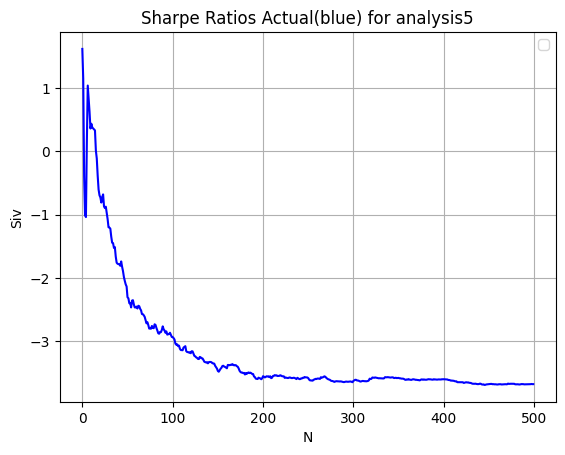

In [143]:
#sum returns for each portfolio:
port_returns_actual1 = allports.sum(axis=1).tolist() # r1    returns for month 1 (ie: Aug returns if predicting for Sep)
stdev1 = allports.std(axis=1).tolist() # SD1    for month 1

#ivports   = IV ports looking into month2:    #using Stock/Port weights of month 1
port_returns_actual2 = allports2.sum(axis=1).tolist() # r2 month 2 (ie: Sep returns if predicting for Sep)
stdev2 = allports2.std(axis=1).tolist()


#print(port_returns_actual1)
#Siv3 = [(x - (RFR)) / y for x, y in zip(port_returns_actual1, stdevaug)]
Siv2 = [(x - (RFR/100)) / y for x, y in zip(port_returns_actual1, ivports)]
Sact2 = [(x - (RFR/100)) / y for x, y in zip(port_returns_actual2, stdev2)]

#plt.plot(Siv2, color='red')
plt.plot(Sact2, color='blue')
plt.grid(True)
plt.legend()
plt.title("Sharpe Ratios Actual(blue) for analysis"+str(AnalysisNumber))
plt.xlabel("N")
plt.ylabel("Siv")
plt.show()

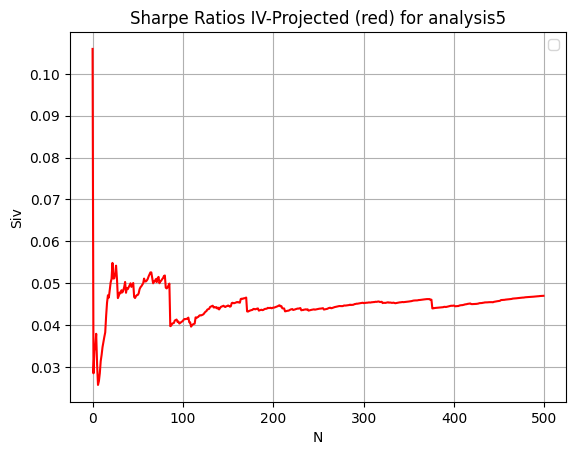

In [144]:
plt.plot(Siv2, color='red')
#plt.plot(Sact2, color='blue')
plt.grid(True)
plt.legend()
plt.title("Sharpe Ratios IV-Projected (red) for analysis"+str(AnalysisNumber))
plt.xlabel("N")
plt.ylabel("Siv")
plt.show()

In [145]:
rankSiv2 = sorted(range(len(Siv2)), key=lambda i: Siv2[i], reverse=True)
print(rankSiv2)
rankSact2 = sorted(range(len(Sact2)), key=lambda i: Sact2[i], reverse=True)
print(rankSact2)

[0, 22, 26, 64, 65, 25, 63, 80, 79, 62, 73, 66, 78, 72, 24, 57, 23, 21, 27, 61, 70, 77, 60, 76, 69, 58, 59, 68, 75, 36, 71, 20, 45, 74, 56, 42, 67, 85, 55, 44, 41, 84, 54, 43, 35, 40, 53, 83, 81, 38, 82, 39, 52, 19, 32, 34, 33, 30, 37, 31, 51, 50, 49, 17, 499, 29, 498, 497, 496, 495, 494, 48, 493, 492, 491, 490, 489, 488, 487, 486, 485, 46, 484, 483, 482, 481, 480, 479, 478, 18, 477, 170, 476, 475, 474, 473, 169, 472, 47, 471, 28, 470, 168, 469, 468, 167, 467, 466, 465, 165, 464, 166, 164, 463, 373, 370, 372, 371, 369, 462, 461, 368, 367, 366, 460, 459, 458, 365, 457, 375, 364, 456, 363, 455, 454, 374, 362, 453, 361, 452, 360, 359, 357, 358, 356, 355, 451, 354, 450, 353, 449, 448, 352, 351, 447, 316, 350, 446, 317, 349, 445, 315, 348, 313, 320, 347, 314, 444, 319, 160, 346, 343, 318, 312, 311, 345, 441, 162, 342, 442, 440, 344, 439, 310, 309, 438, 327, 443, 341, 437, 340, 436, 159, 161, 306, 434, 435, 308, 329, 305, 307, 339, 326, 330, 333, 328, 338, 433, 163, 325, 304, 299, 16, 303, 1

In [146]:
rankdf = pd.DataFrame()
rankdf['Siv'] = rankSiv2
rankdf['Sact'] = rankSact2
rankdf['ivports'] = ivports
rankdf['stdev2'] = stdev2
#take predicted best N portfolio, and get the actual returns for that portfolio
bestNpred = rankSiv2[0]
#print( allports2.iloc[bestNpred-1].values)
act4best = pd.DataFrame()
act4best['returns'] = allports2.iloc[bestNpred-1].values
print(rankdf)
print(act4best)



     Siv  Sact    ivports    stdev2
0      0     0   9.721082  0.128239
1     22     1  25.016849  0.132343
2     26     6  29.208643  0.140980
3     64     7  29.077173  0.148002
4     65     8  24.063803  0.134305
..   ...   ...        ...       ...
495    5   484  12.293621  0.066095
496    1   459  12.289999  0.066085
497    8   443  12.288369  0.066088
498    7   446  12.286076  0.066091
499    6   445  12.284311  0.066092

[500 rows x 4 columns]
     returns
0   0.099852
1   0.108115
2  -0.086998
3   0.000000
4   0.000000
5  -0.052474
6   0.111154
7  -0.083258
8  -0.072202
9   0.029565
10  0.000000
11  0.000000
12  0.105482
13  0.002415
14  0.027906
15 -0.126059
16 -0.017780
17  0.000000
18  0.000000
19  0.000000
20 -0.182217
21 -0.010235
22  0.049513
23 -0.096092
24  0.000000
25  0.000000
26  0.028299
27 -0.032089
28  0.000000
29  0.000000
30  0.000000


In [147]:
text = 'W2rank'+str(AnalysisNumber)
file = '/content/drive/My Drive/'
ext = '.csv'
rankdf.to_csv(file+text+ext, index=False)

text = 'W2act4best'+str(AnalysisNumber)
file = '/content/drive/My Drive/'
ext = '.csv'
act4best.to_csv(file+text+ext, index=False)